#Assignment 3:
    test if the distribution of ages can be modelled by a Gaussian
    
    1) all riders
    
    2) summer riders vs winder riders
    
    use 2 tests, you can use KS, AD, or get creative. use KL or chi2 like you did in Assignment2 or perhaps new ones!
    
    CHALLANGE! look for a better distribution to fit the data! see notes on how to input a number of different 
    distributions into the test, not just 'norm' and the few others available by keyword

my usual imports and setups

In [18]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

#this makes my plots pretty! but it is totally not mandatory to do it
import json
s = json.load( open(os.getenv ('PUI2015')+"/PUI2015_fbianco/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

#i know i will use scipy for the tests
import scipy.stats 

Populating the interactive namespace from numpy and matplotlib


I need 2 seasons, lets start reading in data from January 2015, and June 2015. 
One month is not a season. You should import data from other months in the winter as well, and then several summer months to get the other distribution. I am being lazy but you should not be. 



In [19]:
df_W=pd.read_csv('201501-citibike-tripdata.csv')
print df_W.columns
df_S=pd.read_csv('201505-citibike-tripdata.csv')


Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


## get the age like we did before, subscribers only cause otherwise the ages are really sparse anyways


In [20]:
#df is the dataframe where the content of the csv file is stored
df_W['age'] = 2015-df_W['birth year'][(df_W['usertype'] == 'Subscriber')]
df_S['age'] = 2015-df_S['birth year'][(df_S['usertype'] == 'Subscriber')]
df_ALL = pd.concat([df_S,df_W], axis=0)

lets split age in 10 year bins. see the comment in assignment 1 about this

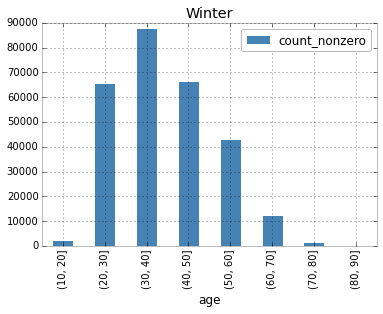

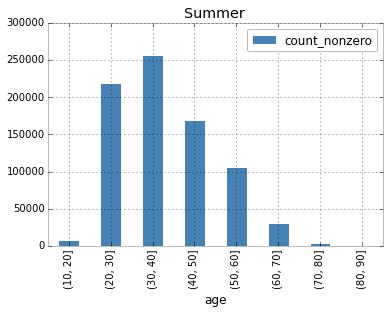

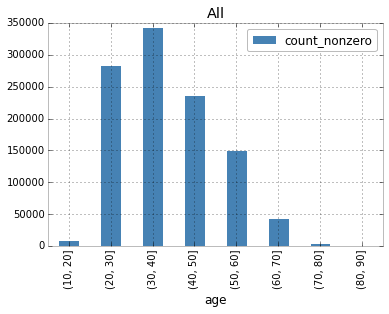

In [21]:
bins = np.arange(10, 99, 10)
df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Winter")
W_age_dist = df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero])
df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Summer")
S_age_dist = df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero])
df_ALL.age.groupby(pd.cut(df_ALL.age, bins)).agg([count_nonzero]).plot(kind='bar', title="All")
A_age_dist = df_ALL.age.groupby(pd.cut(df_ALL.age, bins)).agg([count_nonzero])

how do they look? what should I expect? setting some expectation is useful as a sanity check!

lets run the scipy KS test

#KS testsfor goodness of fit

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

##Comapre to Normal

In [22]:
#compare to normal

ksW=scipy.stats.kstest(W_age_dist, 'norm')
ksS=scipy.stats.kstest(S_age_dist, 'norm')
ksA=scipy.stats.kstest(A_age_dist, 'norm')
print "winter, normal fit", ksW
print "summer, normal fit", ksS
print "All riders, normal fit", ksA

winter, normal fit KstestResult(statistic=1.0, pvalue=0.0)
summer, normal fit KstestResult(statistic=1.0, pvalue=0.0)
All riders, normal fit KstestResult(statistic=1.0, pvalue=0.0)


## Compare to cauchy

In [23]:
#compare to cauchy
ksW=scipy.stats.kstest(W_age_dist, 'cauchy')
ksS=scipy.stats.kstest(S_age_dist, 'cauchy')
ksA=scipy.stats.kstest(A_age_dist, 'norm')
print "winter, normal fit", ksW
print "summer, normal fit", ksS
print "All riders, normal fit", ksA

winter, normal fit KstestResult(statistic=0.99999637418970078, pvalue=0.0)
summer, normal fit KstestResult(statistic=0.99999875824151641, pvalue=0.0)
All riders, normal fit KstestResult(statistic=1.0, pvalue=0.0)


the scipy KS test works with keywords only for scipy.stats distributions 
that take as a single argument the size of the sample, like norm and cauchy look them up to make sure I am right!
if i want to test against a distribution which takes more arguments like Poisson, which in scipy.stats takes the 
lambda parameter and the size (2 arguments) i can pass the extra arguments in arg, like i do below: 

##Compare to Gamma

In [24]:
ksW=scipy.stats.kstest(W_age_dist, 'gamma', args=(35,))
ksS=scipy.stats.kstest(S_age_dist, 'gamma', args=(35,))
ksA=scipy.stats.kstest(A_age_dist, 'gamma', args=(35,))
print "winter, normal fit", ksW
print "summer, normal fit", ksS
print "All riders, normal fit", ksA

winter, normal fit KstestResult(statistic=1.0, pvalue=0.0)
summer, normal fit KstestResult(statistic=1.0, pvalue=0.0)
All riders, normal fit KstestResult(statistic=1.0, pvalue=0.0)


or i can create my function separately, then call it: all i need to do is define a function that calls  like i am doing below. the size argument must come first, and the second argument of kstest will no longer be a string, but the function itself (what we would call a "callable")

###AD test to normal

In [25]:
adW=scipy.stats.anderson(W_age_dist['count_nonzero'], dist='norm')
adS=scipy.stats.anderson(S_age_dist['count_nonzero'], dist='norm')
adA=scipy.stats.anderson(A_age_dist['count_nonzero'], dist='norm')

In [26]:
print "winter, normal fit", adW
print "summer, normal fit", adS
print "All riders, normal fit", adA

winter, normal fit AndersonResult(statistic=0.51784746818828786, critical_values=array([ 0.519,  0.591,  0.709,  0.827,  0.984]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
summer, normal fit AndersonResult(statistic=0.49229105991073396, critical_values=array([ 0.519,  0.591,  0.709,  0.827,  0.984]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
All riders, normal fit AndersonResult(statistic=0.48793263708961732, critical_values=array([ 0.519,  0.591,  0.709,  0.827,  0.984]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


##AD test to expon

In [27]:
adW=scipy.stats.anderson(W_age_dist['count_nonzero'], dist='expon')
adS=scipy.stats.anderson(S_age_dist['count_nonzero'], dist='expon')
adA=scipy.stats.anderson(A_age_dist['count_nonzero'], dist='expon')

In [28]:
print "winter, normal fit", adW
print "summer, normal fit", adS
print "All riders, normal fit", adA

winter, normal fit AndersonResult(statistic=1.5981565415121732, critical_values=array([ 0.858,  1.003,  1.247,  1.494,  1.82 ]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
summer, normal fit AndersonResult(statistic=1.6768186721552709, critical_values=array([ 0.858,  1.003,  1.247,  1.494,  1.82 ]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
All riders, normal fit AndersonResult(statistic=1.6397306989825076, critical_values=array([ 0.858,  1.003,  1.247,  1.494,  1.82 ]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


##Shapiro normal test

In [29]:
spW=scipy.stats.shapiro(W_age_dist['count_nonzero'])
spS=scipy.stats.shapiro(S_age_dist['count_nonzero'])
spA=scipy.stats.shapiro(A_age_dist['count_nonzero'])

In [30]:
print "winter, normal fit", spW
print "summer, normal fit", spS
print "All riders, normal fit", spA

winter, normal fit (0.8596777319908142, 0.11918989568948746)
summer, normal fit (0.8603329658508301, 0.12099574506282806)
All riders, normal fit (0.8632670640945435, 0.12939520180225372)


##Comment
Both ADtest and shapiro test results showed that we cannot reject null hypothesis that data are from normal distribution.